 В одной из параллельных вселенных есть планета Земля-222, во многом напоминающая нашу Землю. На ней существует около 250 государств, три из которых, Альватия, Бовария и Вольверас, имеют площадь 3 млн кв.км, 220 тыс кв.км, и 3 тыс кв.км соответственно. Каково население столиц каждой из них? Чем меньше средняя относительная (в %) ошибка, тем лучше ваш ответ.

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import math

Данные возьмем с Википедии

In [29]:
#https://en.wikipedia.org/wiki/List_of_national_capitals_by_population
capitals = pd.read_excel('capital.xlsx')
capitals = capitals.drop(['Rank', 'Year', 'Percent of Population'], axis = 'columns')
capitals['Population'] = capitals['Population'].apply(lambda x : int(str(x).split('♠')[1].split('[')[0].split(' ')[0].replace(',', '')))
capitals.rename(index=str, columns = {'Country/Territory' : 'Country'}, inplace = True)
capitals['Country'] = capitals['Country'].apply(lambda x : str(x).split('[')[0].strip())
scale = lambda x: math.log(x)
capitals['Population'] = capitals['Population'].apply(scale)
capitals

,Country,Capital,Population
0,China,Beijing,16.845306
1,India,New Delhi,16.636172
2,Japan,Tokyo,16.394894
3,Philippines,Manila,16.370973
4,Russia,Moscow,16.261416
5,Egypt,Cairo,16.140869
6,Indonesia,Jakarta,16.136681
7,Democratic Republic of the Congo,Kinshasa,16.130518
8,South Korea,Seoul,16.117075
9,Bangladesh,Dhaka,16.002236


In [30]:
#https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area
areas = pd.read_excel('area.xlsx')
areas = areas[areas.index % 2 == 0]
areas['Total in km2 (mi2)'] = areas['Total in km2 (mi2)'].apply(lambda x : float(str(x).split('♠')[1].split('<')[0].replace(',', '')))
areas = areas[areas.columns[1:3]]
areas.rename(index = str, columns = {'Sovereign state/dependency' : "Country", 'Total in km2 (mi2)' : 'Area' }, inplace = True)
areas['Country'] = areas['Country'].apply(lambda x : x.split('[')[0].strip())
areas['Area'] = areas['Area'].apply(scale)
areas

,Country,Area
0,World,20.050062
2,Russia,16.654486
4,Antarctica,16.454568
6,Canada,16.116561
8,China,16.076957
10,United States,16.069438
12,Brazil,15.957430
14,Australia,15.855695
16,India,15.005566
18,Argentina,14.838105


In [31]:
#https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)
regions = pd.read_excel('region.xlsx')
regions = regions[regions.columns[1:4]]
regions.rename(index = str, columns = {'Country or area' : 'Country'}, inplace = True)
regions['Country'] = regions['Country'].apply(lambda x : x.split('[')[0].strip())
regions

,Country,UN continental,UN statistical
0,World,—,—
1,China,Asia,Eastern Asia
2,India,Asia,Southern Asia
3,United States,Americas,Northern America
4,Indonesia,Asia,South-Eastern Asia
5,Brazil,Americas,South America
6,Pakistan,Asia,Southern Asia
7,Nigeria,Africa,Western Africa
8,Bangladesh,Asia,Southern Asia
9,Russia,Europe,Eastern Europe


In [32]:
result = pd.merge(areas, capitals, how = 'inner', on = ['Country'])
result

,Country,Area,Capital,Population
0,Russia,16.654486,Moscow,16.261416
1,Canada,16.116561,Ottawa,13.708092
2,China,16.076957,Beijing,16.845306
3,United States,16.069438,"Washington, D.C.",13.398316
4,Brazil,15.957430,Brasília,14.789516
5,Australia,15.855695,Canberra,12.778870
6,India,15.005566,New Delhi,16.636172
7,Argentina,14.838105,Buenos Aires,14.877141
8,Kazakhstan,14.817942,Astana,13.635370
9,Algeria,14.683342,Algiers,15.043926


По условию альтернативный мир похож на наш, поэтому будем исходить из 2-ух предположений :  
1. Культурные и социальные аспекты схожи с нашим миром  
    * Алватия - страна в юго-восточной Европе, т.к. созвучно со странами в том регионе(Хорватия, Молдавия)
    * Бовария - страна в северо-западной Европе, (немецкая земля Бавария)
    * Вольверас - страна в южной Америке/Карибах, т.к созвучно с бывшими колониальными владениями Испании(Гондурас, Каракас - столица Венесуэлы)
2. Страны имеют схожее распределение населения столицы от площади страны

In [33]:
result = pd.merge(result, regions, how = 'inner', on = ['Country'])
result

,Country,Area,Capital,Population,UN continental,UN statistical
0,Russia,16.654486,Moscow,16.261416,Europe,Eastern Europe
1,Canada,16.116561,Ottawa,13.708092,Americas,Northern America
2,China,16.076957,Beijing,16.845306,Asia,Eastern Asia
3,United States,16.069438,"Washington, D.C.",13.398316,Americas,Northern America
4,Brazil,15.957430,Brasília,14.789516,Americas,South America
5,Australia,15.855695,Canberra,12.778870,Oceania,Australia and New Zealand
6,India,15.005566,New Delhi,16.636172,Asia,Southern Asia
7,Argentina,14.838105,Buenos Aires,14.877141,Americas,South America
8,Kazakhstan,14.817942,Astana,13.635370,Asia,Central Asia
9,Algeria,14.683342,Algiers,15.043926,Africa,Northern Africa


In [34]:
result.to_csv('country_data.csv')

In [35]:
from sklearn.linear_model import LinearRegression
result[result['UN continental'] == 'Europe'].corr()

,Area,Population
Area,1.000000,0.904136
Population,0.904136,1.000000


In [36]:
predict_df = pd.DataFrame({'Country': ['Alvatia', 'Bovaria', 'Volveras'],
                           'Area': [scale(3000000.0), scale(220000.0), scale(3000.0)],
                          'Population' : 0})
alvatia_area = predict_df[predict_df['Country'] == 'Alvatia']['Area'].values.reshape(-1, 1)
bovaria_area = predict_df[predict_df['Country'] == 'Bovaria']['Area'].values.reshape(-1, 1)
volveras_area = predict_df[predict_df['Country'] == 'Volveras']['Area'].values.reshape(-1, 1)
predict_df

,Area,Country,Population
0,14.914123,Alvatia,0
1,12.301383,Bovaria,0
2,8.006368,Volveras,0


In [37]:
import numpy as np
        
def generate_regions(continental_names, statistical_names):
    region_list = [('World', result.corr(), result)]
    for name in continental_names:
        corr = result[result['UN continental'] == name].corr()
        region_list.append( (name, corr, result[result['UN continental'] == name]) )
    for name in statistical_names:
        corr = result[result['UN statistical'] == name].corr()
        region_list.append( (name, corr, result[result['UN statistical'] == name]) )
    return region_list

def generate_multiregion(names, un):
    m_region = []
    res = pd.DataFrame(columns = result.columns)
    for name in names:
        res = res.append(result[result[un] == name], ignore_index = True)
    #print(res)
    #res = res.drop(res[res.Country == "Mexico"].index, axis = 0)
    #res = res[res.Country != 'Mexico']
    m_region.append( (names, res.corr(), res) )
    return m_region

def regress_plot(region_list, country_area):
    avg = 0
    for region_name, corr, region in region_list:
        region_area = region['Area'].values.reshape(-1, 1)
        region_pop = region['Population'].values.reshape(-1, 1)
        #print(ee_result)

        linear_regressor = LinearRegression()
        linear_regressor.fit(region_area, region_pop)
        regression_pred = linear_regressor.predict(region_area)
        country_pop = linear_regressor.predict(country_area)

        print('Correlation of ' + str(region_name))
        print(corr)
        print('\n Score R^2: %f' % linear_regressor.score(region_area, region_pop))
        plt.figure(figsize=(15, 5))
        plt.title(region_name)
        plt.xlabel('Country Area ( * 1000 )')
        plt.ylabel('Capital Population ( * 1000 )')
        norm = lambda x : x #/ 1000
        max_area = np.append(region_area, country_area).max()
        max_pop = np.append(region_pop, country_pop).max()
        ticks_count = 10
        plt.xticks(np.arange(0, norm(max_area), norm(max_area) // ticks_count))
        plt.yticks(np.arange(0, norm(max_pop), norm(max_pop) // ticks_count))
        plt.plot(norm(region_area), norm(region_pop), 'bo')
        plt.plot(norm(region_area), norm(regression_pred), 'k--')
        plt.plot(norm(country_area), norm(country_pop), 'ro')
        plt.show()
        avg += country_pop
        print('Predicted population: %d \n' % np.e**country_pop)
    print('Average predicted population: %d' % (avg / len(region_list)))

Correlation of World
                Area  Population
Area        1.000000    0.793519
Population  0.793519    1.000000

 Score R^2: 0.629672


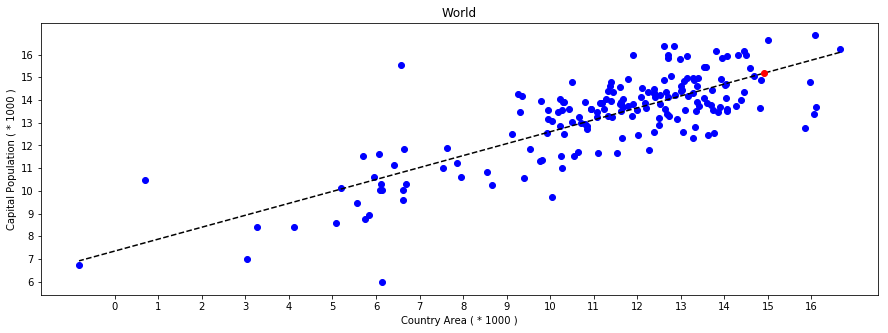

Predicted population: 3926067 

Correlation of Europe
                Area  Population
Area        1.000000    0.904136
Population  0.904136    1.000000

 Score R^2: 0.817462


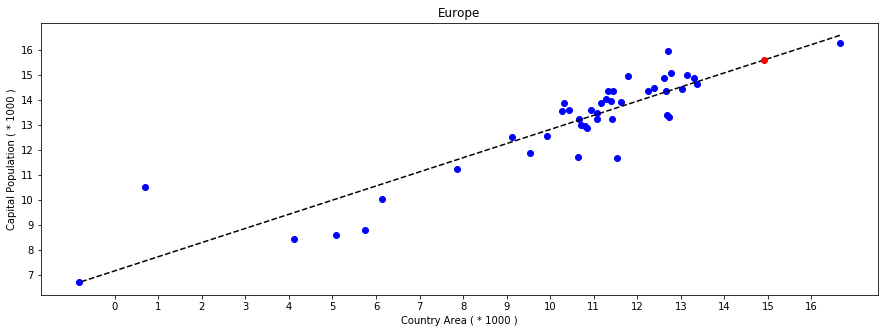

Predicted population: 5956098 

Correlation of Eastern Europe
               Area  Population
Area        1.00000     0.94289
Population  0.94289     1.00000

 Score R^2: 0.889041


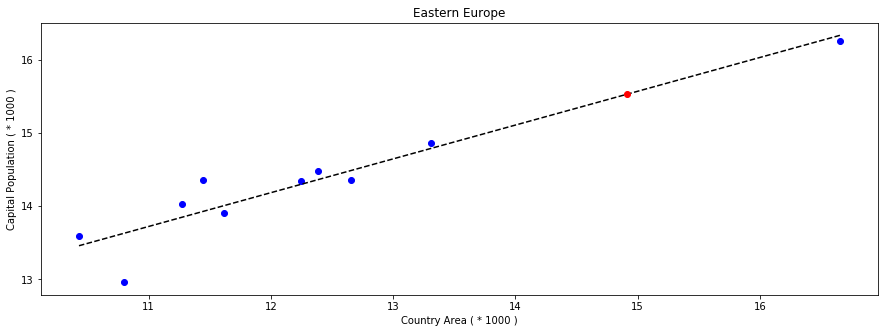

Predicted population: 5556324 

Correlation of Southern Europe
                Area  Population
Area        1.000000    0.970122
Population  0.970122    1.000000

 Score R^2: 0.941137


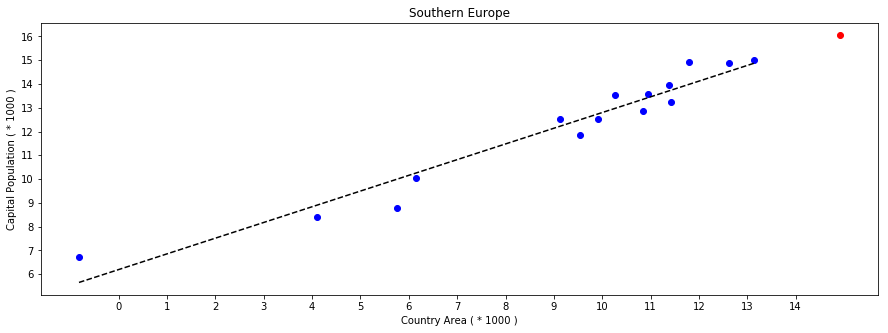

Predicted population: 9291944 

Average predicted population: 15


In [39]:
regions = generate_regions(['Europe'], ['Eastern Europe', 'Southern Europe'])
regress_plot(regions, alvatia_area)

Correlation of ['Eastern Europe', 'Southern Europe']
                Area  Population
Area        1.000000    0.971071
Population  0.971071    1.000000

 Score R^2: 0.942978


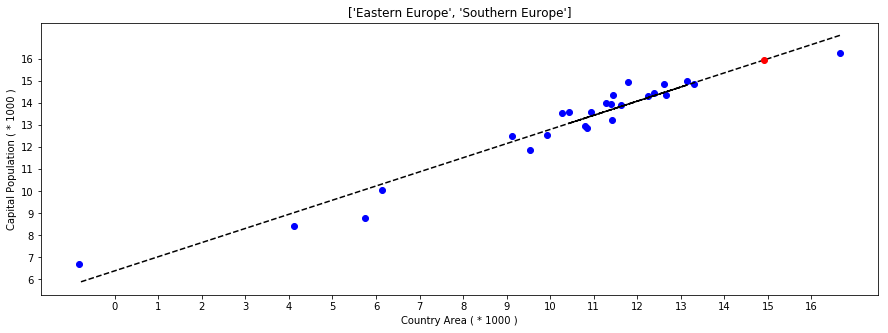

Predicted population: 8562508 

Average predicted population: 15


In [40]:
region = generate_multiregion(['Eastern Europe', 'Southern Europe'], 'UN statistical')
regress_plot(region, alvatia_area)

In [40]:
#Answer Alvatia:
int((3336361 + 3006039 + 3169424 + 2913966) / 4)

3106447

Во всех регионах, кроме южной Европы, получились схожие значения.  
Аномалия объясняется большой удаленностью предсказываемого значения от точек регрессии.  
В столице Алватии ~ 3.106 тысяч людей

Correlation of World
                Area  Population
Area        1.000000    0.402122
Population  0.402122    1.000000

 Score R^2: 0.161702


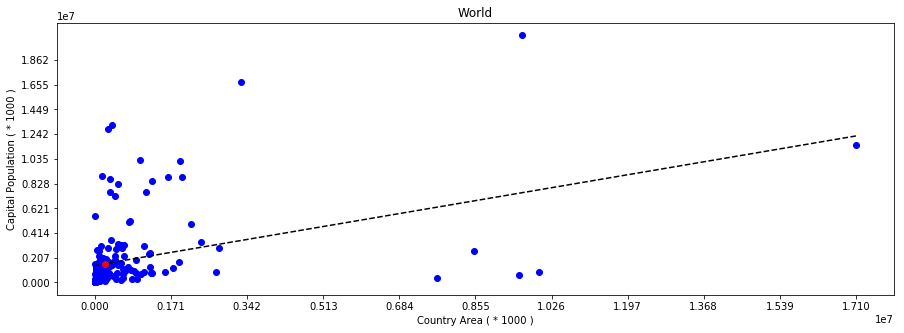

Predicted population: 1575051 

Correlation of Europe
                Area  Population
Area        1.000000    0.746558
Population  0.746558    1.000000

 Score R^2: 0.557350


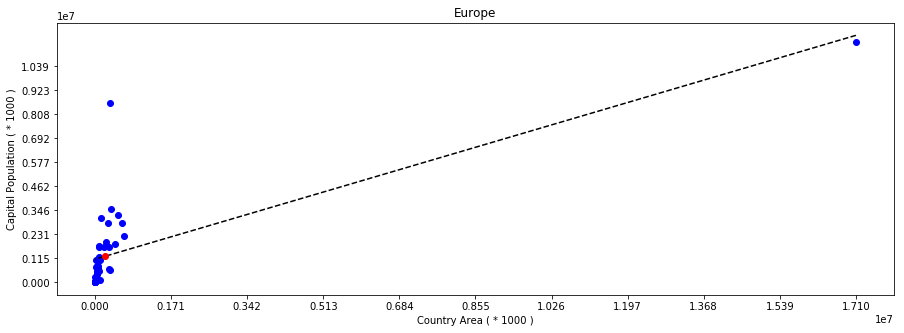

Predicted population: 1256004 

Correlation of Western Europe
                Area  Population
Area        1.000000    0.752085
Population  0.752085    1.000000

 Score R^2: 0.565631


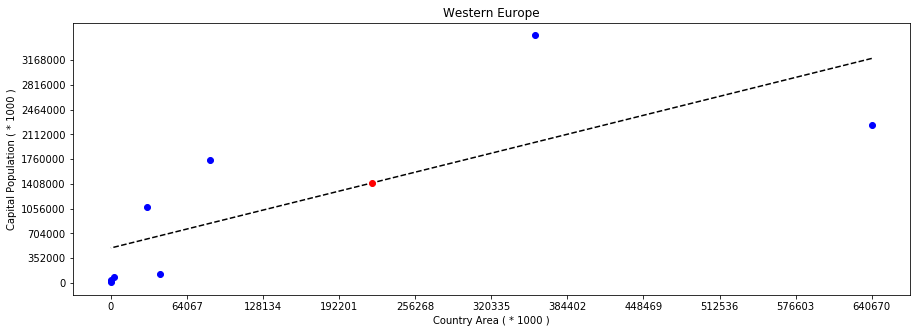

Predicted population: 1421513 

Correlation of Northern Europe
                Area  Population
Area        1.000000    0.427014
Population  0.427014    1.000000

 Score R^2: 0.182341


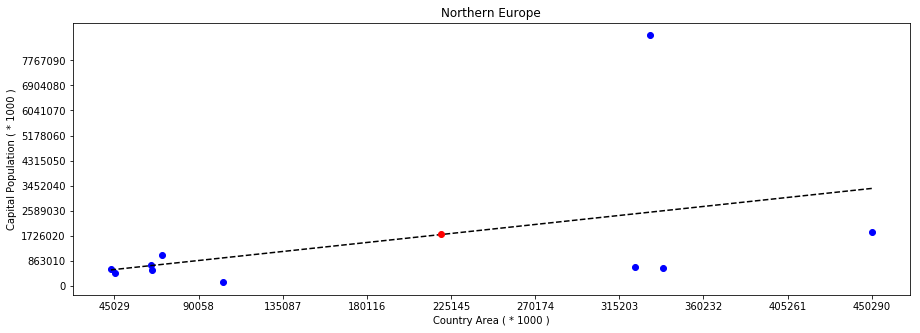

Predicted population: 1767395 

Average predicted population: 1504991


In [26]:
regions = generate_regions(['Europe'], ['Western Europe', 'Northern Europe'])
regress_plot(regions, bovaria_area)

Correlation of ['Western Europe', 'Northern Europe']
                Area  Population
Area        1.000000    0.488387
Population  0.488387    1.000000

 Score R^2: 0.238522


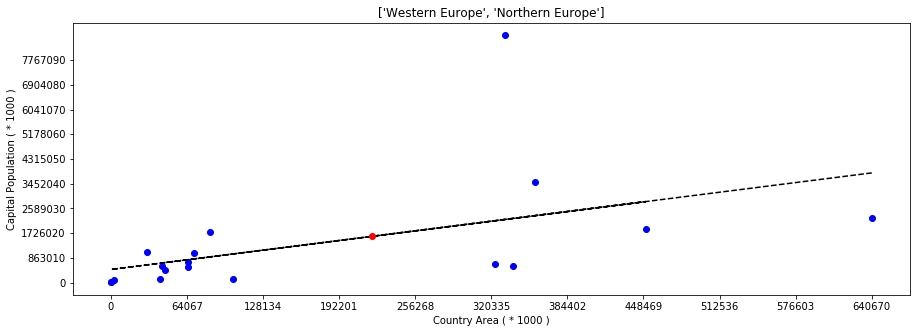

Predicted population: 1615883 

Average predicted population: 1615883


In [27]:
region = generate_multiregion(['Western Europe', 'Northern Europe'], 'UN statistical')
regress_plot(region, bovaria_area)

In [43]:
#Answer Bovaria
int((1575051 + 1256004 + 1421513 + 1767395 + 1615883) / 5)

1527169

В столице Боварии ~ 1.527 тысяч людей

Correlation of World
                Area  Population
Area        1.000000    0.793519
Population  0.793519    1.000000

 Score R^2: 0.629672


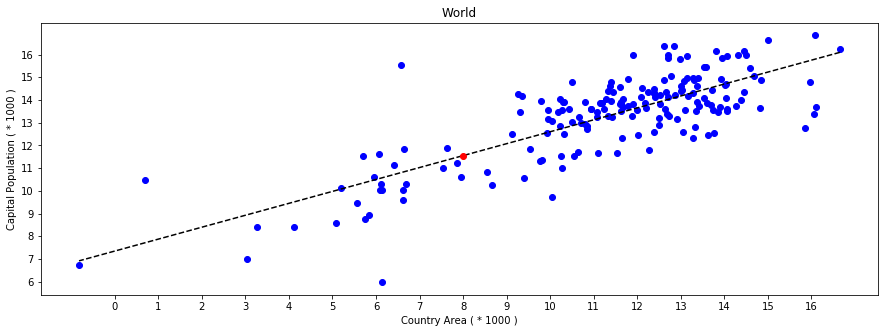

Predicted population: 104317 

Correlation of Americas
               Area  Population
Area        1.00000     0.81234
Population  0.81234     1.00000

 Score R^2: 0.659896


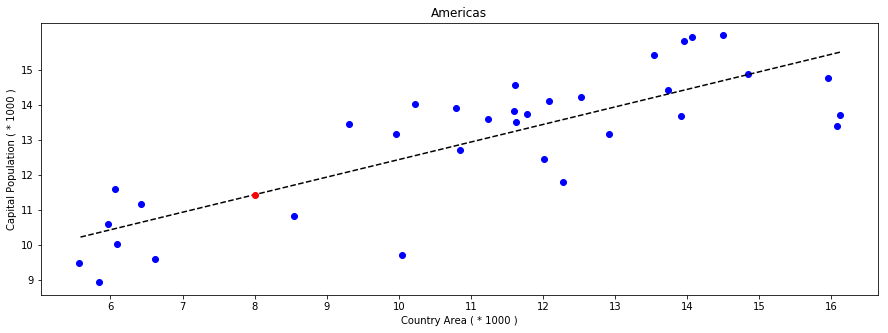

Predicted population: 92811 

Correlation of Central America
                Area  Population
Area        1.000000    0.812918
Population  0.812918    1.000000

 Score R^2: 0.660835


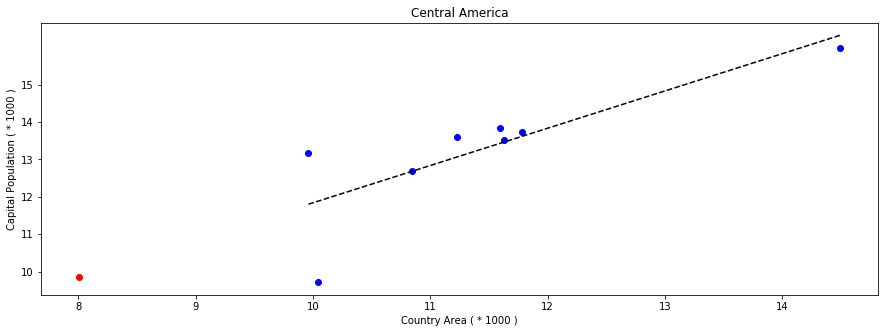

Predicted population: 18976 

Correlation of Caribbean
                Area  Population
Area        1.000000    0.908433
Population  0.908433    1.000000

 Score R^2: 0.825251


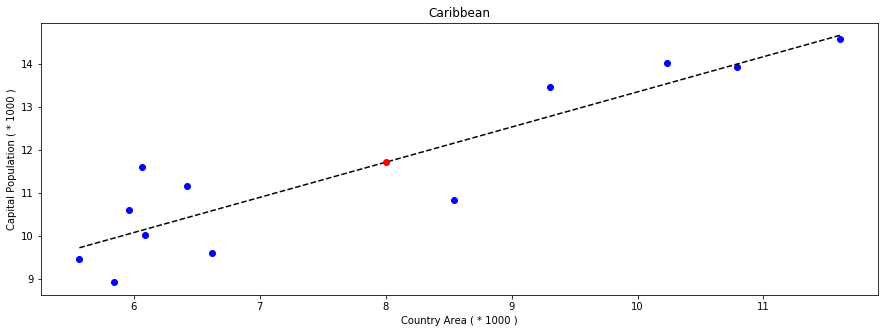

Predicted population: 123465 

Average predicted population: 11


In [41]:
regions = generate_regions(['Americas'], ['Central America', 'Caribbean'])
regress_plot(regions, volveras_area)

Correlation of ['Central America', 'Caribbean']
                Area  Population
Area        1.000000    0.866292
Population  0.866292    1.000000

 Score R^2: 0.750462


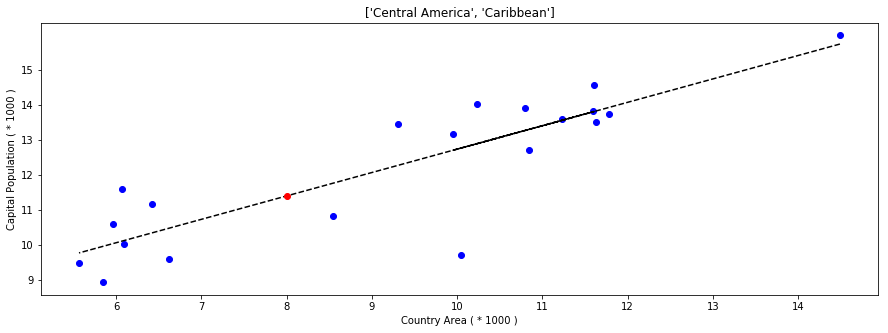

Predicted population: 89629 

Average predicted population: 11


In [42]:
region = generate_multiregion(['Central America', 'Caribbean'], 'UN statistical')
regress_plot(region, volveras_area)

In [19]:
#Answer Volveras
#(1437568 + 1432487 + 308961 + 176673 + 359971 ) / 5
int((308961 + 176673 + 359971 ) / 3)

281868

В моделях мира и обеих Америк получились значения, значительно превышающие значения, полученные в локальных регионах.  
Поэтому мы их учитывать не будем.
В столице Вольвераса ~ 282 тысячи людей